In [146]:
from __future__ import division 
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [184]:
X = np.arange(-3, 3+0.05, 0.05) 
T = np.arange(0, 2+(0.5*0.05), (0.5*0.05))
U = np.zeros((len(T),len(X))) 
W = np.zeros((len(T),len(X))) 


In [185]:
B = np.matrix([[1/3, 0], [0, -1/3]])

In [186]:
def A(t) :
    a1 = (1/3)*(t-2)
    a2 = (2/3)*(t+1)
    a3 = (1/3)*(t+1)
    a4 = (1/3)*((2*t) - 1)
    x = np.matrix([[a1, a2], [a3, a4]])
    return x

In [187]:
def u_0(x):
    v = 1 - abs(x)
    c = max(0 , v)
    return c

def w_0(x):
    v = 1 - 2*abs(x)
    c = max(0 , v)
    return c

In [188]:
for j in range(len(X)):
    U[0, j] = u_0(X[j])
    W[0, j] = w_0(X[j])

In [189]:
d = np.linalg.inv(np.identity(2) + 0.5*0.05*B)
# print(U[0,:])

In [190]:
A(T[0])

matrix([[-0.66666667,  0.66666667],
        [ 0.33333333, -0.33333333]])

In [191]:
for k in range(1, len(T)-1): 
    for j in range(1, len(X)-1): 
        x1 = (np.identity(2) - (A(T[k-1])*0.5))
        x2 = (np.identity(2) + (A(T[k-1])*0.5))

        vals = d * 0.5 * ((x1 * np.matrix([[U[k, j+1]], [W[k, j+1]]])) + (x2 * np.matrix([[U[k, j-1]], [W[k, j-1]]])))        



        
        U[:,len(X)-1] = 0 


In [192]:
for k in range(0, len(T)-1): 
    for j in range(1, len(X)-1): 
        x1 = (np.identity(2) - (A(T[k-1])*0.5))
        x2 = (np.identity(2) + (A(T[k-1])*0.5))

        vals = d * 0.5 * ((x1 * np.matrix([[U[k, j+1]], [W[k, j+1]]])) + (x2 * np.matrix([[U[k, j-1]], [W[k, j-1]]])))        



        U[k+1, j] = vals[0]
        W[k+1, j] = vals[1]
#         U[:,len(X)-1] = 0 


In [193]:
for k in range(1, len(T)-2): 
    for j in range(1, len(X)-1): 
        x1 = (np.identity(2) - (A(T[k-1])*0.5))
        x2 = (np.identity(2) + (A(T[k-1])*0.5))

        vals = d * 0.5 * ((x1 * np.matrix([[U[k, j+1]], [W[k, j+1]]])) + (x2 * np.matrix([[U[k, j-1]], [W[k, j-1]]])))
       
        W[k+1, j] = vals[1]
    W[k, 0] = W[k, 1]
    W[k, len(X)-1] = W[k, len(X)-2]

        

Text(0.5, 1.0, 'Initial value of u: u(0, x)')

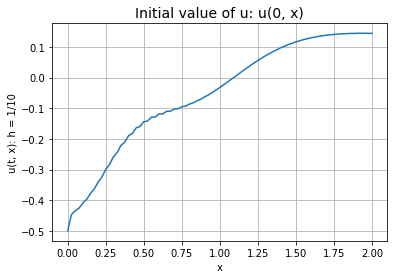

In [194]:
plt.figure()
plt.plot(T, -U[:,50])
plt.xlabel('x')
plt.ylabel('u(t, x): h = 1/10') 
plt.grid()
plt.title("Initial value of u: u(0, x)", fontsize=14)

Text(0.5, 1.0, 'Initial value of u: w(0, x)')

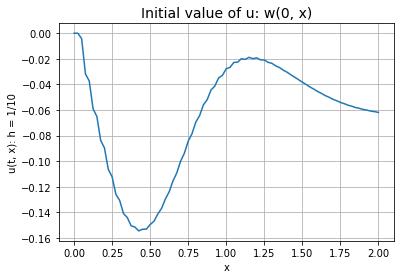

In [195]:
plt.figure()
plt.plot(T, -W[:,50])
plt.xlabel('x')
plt.ylabel('u(t, x): h = 1/10') 
plt.grid()
plt.title("Initial value of u: w(0, x)", fontsize=14)

Text(0.5, 1.0, 'Initial value of u: u(0, x)')

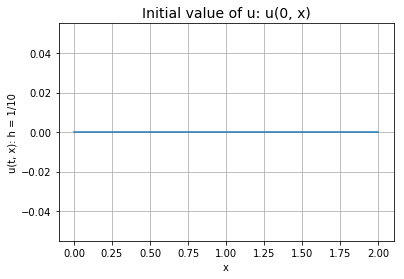

In [196]:
plt.figure()
plt.plot(T, -U[:,120])
plt.xlabel('x')
plt.ylabel('u(t, x): h = 1/10') 
plt.grid()
plt.title("Initial value of u: u(0, x)", fontsize=14)

Text(0.5, 1.0, 'Initial value of u: w(0, x)')

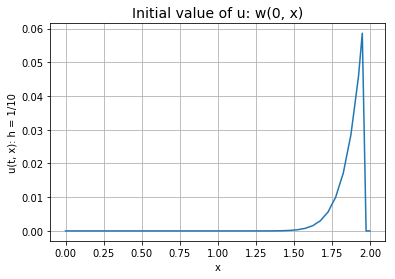

In [197]:
plt.figure()
plt.plot(T, W[:,120])
plt.xlabel('x')
plt.ylabel('u(t, x): h = 1/10') 
plt.grid()
plt.title("Initial value of u: w(0, x)", fontsize=14)

(81, 121) (81, 121) (81, 121)


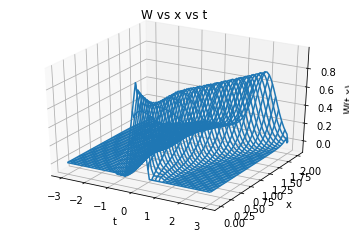

In [198]:
# print(X)
Y, X1 = np.meshgrid(X, T)
print(X1.shape, Y.shape, U.shape)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_wireframe(Y, X1, W)
ax.set_xlabel('t')
ax.set_ylabel('x')
ax.set_zlabel('W(t,x)')
ax.set_title('W vs x vs t')
#     plt.savefig('Plots/Prob7_3d_2.png')
plt.show()

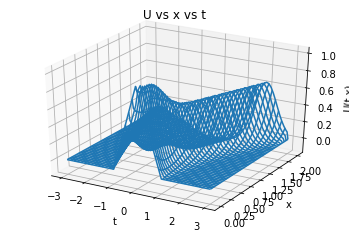

In [199]:
# print(X)
Y, X1 = np.meshgrid(X, T)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_wireframe(Y, X1, U)
ax.set_xlabel('t')
ax.set_ylabel('x')
ax.set_zlabel('U(t,x)')
ax.set_title('U vs x vs t')
plt.show()

In [200]:
print(U)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.04775855 0.06719262 ... 0.07005811 0.05702133 0.        ]
 [0.         0.05046389 0.07037746 ... 0.08748082 0.06963949 0.        ]
 [0.         0.05285584 0.07373541 ... 0.10504757 0.08754122 0.        ]]
